<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/Diabetes_detection_keras_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Aim:** Diabetes Detection using Keras Deep Learning Model

**Solution Approach:** Load diabetes dataset and perform data alaysis and feature selection. Split into train and test datasets. Build a sequential kears model with varying model parameters like no of hidden layers, activation type, no of nodes etc., and test output accuracy using accuracy and loss epoch graphs

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import required libraries to build model
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical




In [ ]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [ ]:
# load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Example 1

In [ ]:
# set x (independent) and y (dependent variables)
x = df[['Pregnancies','Glucose','BloodPressure']]
print(f"x: \n {x.head()}")

y = df['Outcome']
print(f"y: \n {y.head()}")

x: 
    Pregnancies  Glucose  BloodPressure
0            6      148             72
1            1       85             66
2            8      183             64
3            1       89             66
4            0      137             40
y: 
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
print(x.shape)
print(y.shape)

(768, 3)
(768,)


In [ ]:
# spilt into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Analyse shape of data
print("Shape of train data: ",x_train.shape, y_train.shape)
print("Shape of test data: ",x_test.shape, y_test.shape)


Shape of train data:  (614, 3) (614,)
Shape of test data:  (154, 3) (154,)


In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print("num_labels: ", num_labels)

# convert labels to one hot encoded values
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

num_labels:  2


In [ ]:
# printing lables after on hot encoding
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# resize and normalize
x_train = x_train.values.reshape((x_train.shape[0],3))
x_train = x_train.astype('float32')
x_test = x_test.values.reshape((x_test.shape[0],3))
x_test = x_test.astype('float32')

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 3) (614, 2) (154, 3) (154, 2)


In [ ]:
# setting network parameters
batch_size = 10
hidden_nodes = 8
dropout = 0.4


In [ ]:
# build a Sequential model with 1 hidden layer containing 8 nodes
from keras import models
model = models.Sequential()
model.add(Dense(hidden_nodes, activation='relu',input_dim = 3,name= "Hidden_Layer_1"))
model.add(Dropout(dropout))
model.add(Dense(2, activation = 'softmax',name= "Output_layer"))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 8)                 32        
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 Output_layer (Dense)        (None, 2)                 18        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',
              metrics=['accuracy'])


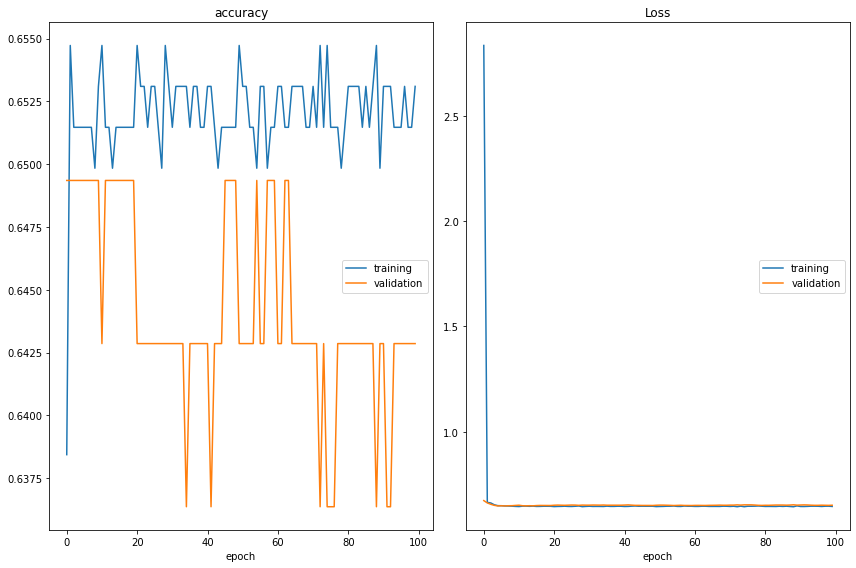

accuracy
	training         	 (min:    0.638, max:    0.655, cur:    0.653)
	validation       	 (min:    0.636, max:    0.649, cur:    0.643)
Loss
	training         	 (min:    0.644, max:    2.834, cur:    0.646)
	validation       	 (min:    0.648, max:    0.674, cur:    0.652)


In [ ]:
# Training the model
model.fit(x_train, y_train, epochs=100,batch_size=batch_size, verbose = False,
         validation_data = (x_test, y_test), callbacks=[plot_losses])

In [ ]:
# evaluate model accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.6515465378761292, 0.6428571343421936]


### Example 2

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import required libraries to build model
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()


In [ ]:
# load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# set x (independent) and y (dependent variables)
x = df.iloc[:,:-1]
print(f"x: \n {x.head()}")

y = df['Outcome']
print(f"y: \n {y.head()}")

x: 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
y: 
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
# spilt into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Analyse shape of data
print("Shape of train data: ",x_train.shape, y_train.shape)
print("Shape of test data: ",x_test.shape, y_test.shape)


Shape of train data:  (614, 8) (614,)
Shape of test data:  (154, 8) (154,)


In [ ]:
# resize and normalize
x_train = x_train.values.reshape((x_train.shape[0],8))
x_train = x_train.astype('float32')
x_test = x_test.values.reshape((x_test.shape[0],8))
x_test = x_test.astype('float32')

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print("num_labels: ", num_labels)

# convert labels to one hot encoded values
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)

num_labels:  2


In [ ]:
# printing lables after on hot encoding
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 8) (614, 2) (154, 8) (154, 2)


In [ ]:
# setting network parameters
batch_size = 10
hidden_nodes = 16


In [ ]:
# build a Sequential model with 3 hidden layer containing 16 nodes each
from keras import models
model = models.Sequential()
model.add(Dense(hidden_nodes, activation='relu',input_dim = 8,name= "Hidden_Layer_1"))
model.add(Dropout(0.5))
model.add(Dense(hidden_nodes, activation='relu',input_dim = 8,name= "Hidden_Layer_2"))
model.add(Dropout(0.4))
model.add(Dense(hidden_nodes, activation='relu',input_dim = 8,name= "Hidden_Layer_3"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = 'softmax',name= "Output_layer"))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                144       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 16)                272       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 16)                272       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 2)               

In [ ]:
# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])


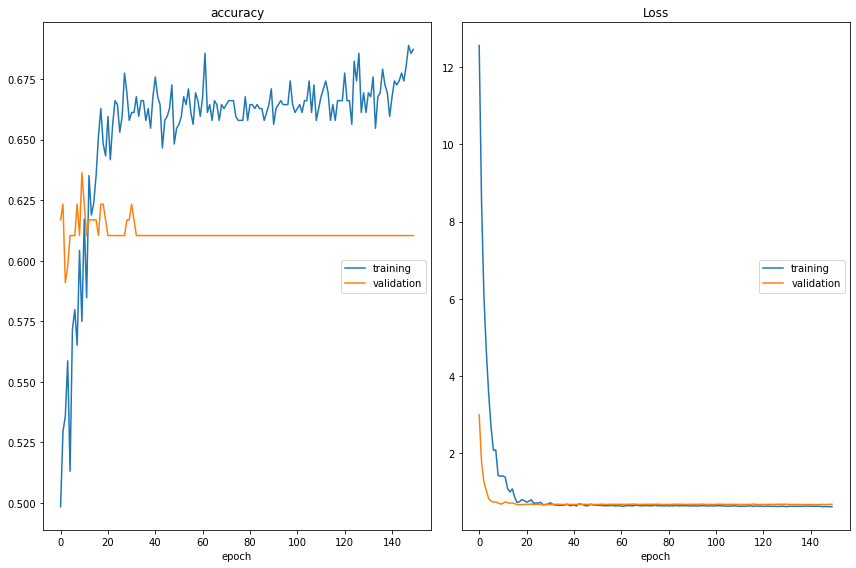

accuracy
	training         	 (min:    0.498, max:    0.689, cur:    0.687)
	validation       	 (min:    0.591, max:    0.636, cur:    0.610)
Loss
	training         	 (min:    0.612, max:   12.560, cur:    0.615)
	validation       	 (min:    0.665, max:    2.993, cur:    0.675)


In [ ]:
# Training the model
model.fit(x_train, y_train, epochs=150,batch_size=batch_size, verbose = False,
         validation_data = (x_test, y_test), callbacks=[plot_losses])

In [ ]:
# evaluate model accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy Score: ",score)

Accuracy Score:  [0.6752248406410217, 0.6103895902633667]
